# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
data=pd.read_csv('Flipkart Laptops.csv')
data

,Unnamed: 0.1,Unnamed: 0,Model Name,Original price,Sale price,Discount,Rating,Processor,Display,RAM,Storage Type,Storage,Operating System
0,0,0,ASUS TUF Gaming F15 - AI Powered Gaming Core i...,"₹75,990","₹53,990",28% off,4.3,Intel Core i5 Processor,15.6 Inch,8 GB,SSD,512 GB,Windows 11
1,1,1,ASUS Vivobook 14 Core i3 11th Gen 1115G4 - (8 ...,"₹49,990","₹30,990",38% off,4.3,Intel Core i3 Processor,14 Inch,8 GB,SSD,512 GB,Windows 11
2,2,2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,"₹69,990","₹38,990",44% off,4.3,Intel Core i5 Processor,15.6 Inch,8 GB,SSD,512 GB,64 bit Windows 11
3,3,3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹39,995","₹29,490",26% off,4.2,AMD Ryzen 3 Dual Core Processor,15.6 Inch,8 GB,SSD,512 GB,Windows 11
4,4,4,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,14,900","₹1,07,990",6% off,4.7,Apple M2 Processor,13.6 Inch,NaN,SSD,256 GB,Mac OS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,554,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 1...,"₹59,390","₹35,055",40% off,4.2,Intel Core i3 Processor,15.6 Inch,8 GB,SSD,256 GB,Windows 11
1021,1021,559,DELL Core i5 12th Gen 1235U - (8 GB/512 GB SSD...,"₹83,170","₹52,490",36% off,NaN,Intel Core i5 Processor,14 Inch,8 GB,SSD,512 GB,Windows 11
1022,1022,567,HP Ryzen 9 Octa Core 6900HX - (32 GB/1 TB SSD/...,"₹1,88,900","₹1,72,500",8% off,NaN,AMD Ryzen 9 Octa Core Processor,16.1 Inch,32 GB,SSD,1 TB,64 bit Windows 11
1023,1023,568,HP Intel Core i5 11th Gen 1155G7 - (8 GB/512 G...,"₹56,903","₹51,990",8% off,4.3,Intel Core i5 Processor,15.6 Inch,8 GB,SSD,512 GB,64 bit Windows 11


In [3]:
data.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Model Name           object
Original price       object
Sale price           object
Discount             object
Rating              float64
Processor            object
Display              object
RAM                  object
Storage Type         object
Storage              object
Operating System     object
dtype: object

In [4]:
data.shape

(1025, 13)

# Data Cleaning

+ Structural Errors
+ Duplicates
+ Missing values
+ Type Casting

In [5]:
data.duplicated().sum()    #checking the duplicates

0

In [6]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

### Finding the Null Values

In [7]:
data.isna().sum()   #before replacing and dropping the null values

Model Name            0
Original price       21
Sale price            0
Discount             21
Rating              289
Processor             0
Display              97
RAM                  27
Storage Type         56
Storage              56
Operating System      0
dtype: int64

In [8]:
#Extracting the Brand Names

def extract_names(full_name):
    names = full_name.split()
    return names[0] if len(names) > 0 else None
data['Brand']=data['Model Name'].apply(extract_names)

### Replacing the Null values

In [9]:
#replacing the null values of the rating column with the mean based on each brand
data.Rating=data.groupby('Brand')['Rating'].transform(lambda x: x.fillna(round(x.mean(),1)))  

In [10]:
data.dropna(inplace=True)   #dropping all other null values

In [11]:
data.isna().sum()  #after replacing and dropping the null values

Model Name          0
Original price      0
Sale price          0
Discount            0
Rating              0
Processor           0
Display             0
RAM                 0
Storage Type        0
Storage             0
Operating System    0
Brand               0
dtype: int64

In [12]:
data.reset_index(inplace=True)   #resetting the index after dropping the null valued rows

In [13]:
data.drop(columns=['index'],inplace=True)

### Rectifying Structural Errors and Type Conversion

In [14]:
for i in range(len(data.Processor)):                   #to remove the structural errors in Processor
    if len(data.Processor[i])>50:
        data.drop(index=[i],inplace=True)

In [15]:
#to remove the structural errors in Original Price,Sale price, Discount and converting the datatypes to int

data['Original price']=data['Original price'].replace("[^0-9]","",regex=True).astype('int')
data['Sale price']=data['Sale price'].replace("[^0-9]","",regex=True).astype('int')
data['Discount %']=data['Discount'].replace("[^0-9]","",regex=True).astype('int')

In [16]:
data.reset_index(inplace=True)

In [17]:
data.drop(columns=['index'],inplace=True)

In [18]:
#to remove the structural errors in Original Price
for i in range(len(data.Display)):
    if len(data.Display[i])>15:
        data.drop(index=[i],inplace=True)
    elif "cm" in data.Display[i]:
        data.drop(index=[i],inplace=True)

In [19]:
data.reset_index(inplace=True)

In [20]:
data.drop(columns=['index'],inplace=True)

In [21]:
#removing the structural errors in operating system

data["Operating System"]=data["Operating System"].replace("(\d+\s\w+\s)","",regex=True).replace("\sHome","",regex=True)

In [22]:
#removing the structural errors in Display and storing them in a new column with float as datatype 

data['Display(inches)']=data.Display.replace("\si?I?\w+","",regex=True).astype('float')

In [23]:
#removing the structural errors in RAM and storing them in a new column with int as datatype

data['RAM(GB)']=data.RAM.replace("[^\d]","",regex=True).astype('int')

In [24]:
# to convert TB to GB

def convert(value):
    if 'TB' in value:
        return int(value.replace('TB',''))*1024  
    elif 'GB' in value:
        return int(value.replace('GB',''))
    
data['Storage(GB)']=data.Storage.apply(convert)  #storing the values into a new column 

In [25]:
data.drop(columns=['Storage','Display','RAM','Discount'],inplace=True)   #dropping unneccesary columns

In [26]:
# re-arranging the dataframe order
data=data[["Model Name","Brand","Processor","RAM(GB)","Storage(GB)","Storage Type",
           "Operating System","Display(inches)","Original price","Sale price","Discount %","Rating"]]

### Showing the Cleaned dataframe

In [28]:
data.to_csv("Laptops cleaned data.csv")

In [63]:
data.head()

,Model Name,Brand,Processor,RAM(GB),Storage(GB),Storage Type,Operating System,Display(inches),Original price,Sale price,Discount %,Rating
0,ASUS TUF Gaming F15 - AI Powered Gaming Core i...,ASUS,Intel Core i5 Processor,8,512,SSD,Windows 11,15.6,75990,53990,28,4.3
1,ASUS Vivobook 14 Core i3 11th Gen 1115G4 - (8 ...,ASUS,Intel Core i3 Processor,8,512,SSD,Windows 11,14.0,49990,30990,38,4.3
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,ASUS,Intel Core i5 Processor,8,512,SSD,Windows 11,15.6,69990,38990,44,4.3
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,HP,AMD Ryzen 3 Dual Core Processor,8,512,SSD,Windows 11,15.6,39995,29490,26,4.2
4,Infinix INBook Y1 Plus Intel Core i3 10th Gen ...,Infinix,Intel Core i3 Processor,8,512,SSD,Windows 11,15.6,49990,23990,52,4.2


In [28]:
data.describe() #describing the dataframe

,RAM(GB),Storage(GB),Display(inches),Original price,Sale price,Discount %,Rating
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,12.492005,583.409594,15.251292,95819.370234,68928.485855,28.011070,4.161009
std,6.131080,254.328219,0.865798,66052.717619,50060.096659,10.772553,0.322425
min,4.000000,8.000000,11.600000,22990.000000,14490.000000,1.000000,1.700000
25%,8.000000,512.000000,14.100000,59109.000000,38990.000000,21.000000,4.100000
50%,8.000000,512.000000,15.600000,78200.000000,54990.000000,28.000000,4.200000
75%,16.000000,512.000000,15.600000,104890.000000,77900.000000,35.000000,4.300000
max,64.000000,2048.000000,18.000000,559990.000000,429990.000000,71.000000,5.000000


In [29]:
data.info()     #checking the datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model Name        813 non-null    object 
 1   Brand             813 non-null    object 
 2   Processor         813 non-null    object 
 3   RAM(GB)           813 non-null    int32  
 4   Storage(GB)       813 non-null    int64  
 5   Storage Type      813 non-null    object 
 6   Operating System  813 non-null    object 
 7   Display(inches)   813 non-null    float64
 8   Original price    813 non-null    int32  
 9   Sale price        813 non-null    int32  
 10  Discount %        813 non-null    int32  
 11  Rating            813 non-null    float64
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 63.6+ KB


# Data Analysis

### Univariate Analysis

In [30]:
data['Display(inches)'].value_counts()

15.60    492
14.00    177
16.00     71
17.30     17
13.30     16
16.10     16
14.10      5
13.40      4
15.00      3
11.60      3
18.00      3
15.30      1
15.36      1
13.80      1
14.96      1
14.50      1
13.78      1
Name: Display(inches), dtype: int64

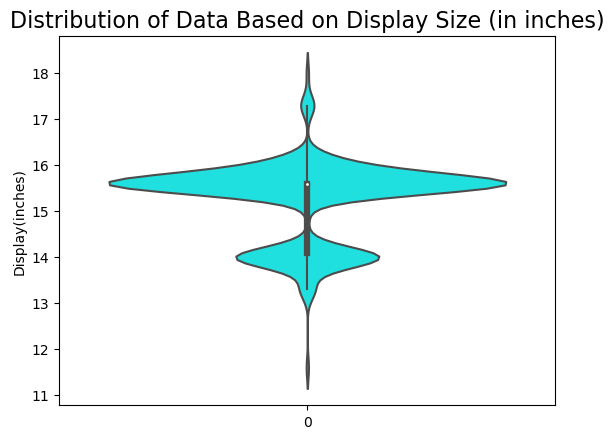

In [67]:
sns.violinplot(data['Display(inches)'],color='cyan')
plt.ylabel('Display(inches)')
plt.title('Distribution of Data Based on Display Size (in inches)', fontsize=16)

plt.show()

**OBSERVATION:** 
+ Here, The width of the violin plot at between 15 and 16 indicates the density of data points. A wider section suggests a higher concentration of laptops with that particular display size of 15.6 inches.
+ The next Hump is at 14,so after 15.6 inches the density of data points is more at 14 inches. 

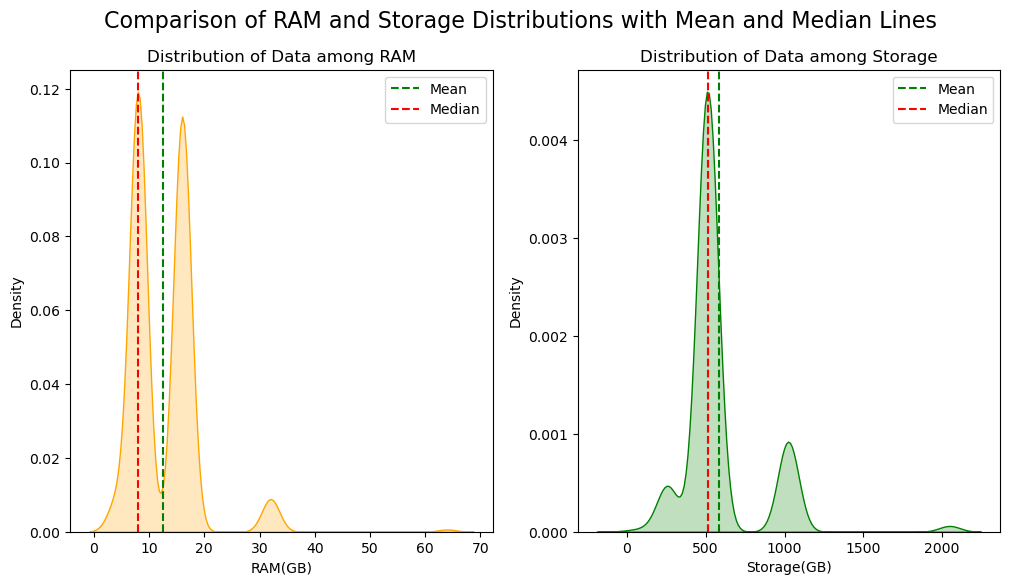

In [74]:
plt.figure(figsize=(12,6))
plt.suptitle('Comparison of RAM and Storage Distributions with Mean and Median Lines', fontsize=16)

plt.subplot(1,2,1)
plt.title('Distribution of Data among RAM')
sns.kdeplot(data['RAM(GB)'],fill=True,color='orange')
plt.axvline(data['RAM(GB)'].mean(),color='green',linestyle='--',label='Mean')
plt.axvline(data['RAM(GB)'].median(),color='red',linestyle="--",label='Median')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Data among Storage')
sns.kdeplot(data['Storage(GB)'],fill=True,color='green')
plt.axvline(data['Storage(GB)'].mean(),color='green',linestyle='--',label='Mean')
plt.axvline(data['Storage(GB)'].median(),color='red',linestyle="--",label='Median')
plt.legend()

plt.show()

**OBSERVATION:** from the above two KDE plots we observe that,
 + Both RAM and Storage are positively skewed because the mean > median
 + In RAM(GB), Data is Distributed mostly among 8GB and 16GB that means these 8GB and 16GB are the most common RAM usage levels.
 + In Storage(GB), Data is Distributed mostly among 512GB that means 512GB is most commonly preferred Storage.

### Bi-Variate Analysis

In [33]:
data.groupby('Brand')['Sale price'].agg(['min','max'])

,min,max
Brand,,
APPLE,84990,162990
ASUS,18590,429990
AXL,17990,17990
Acer,17990,243740
CHUWI,23990,23990
DELL,28780,380066
GIGABYTE,79990,148990
HP,18949,261877
Infinix,23990,80990


<Figure size 700x700 with 0 Axes>

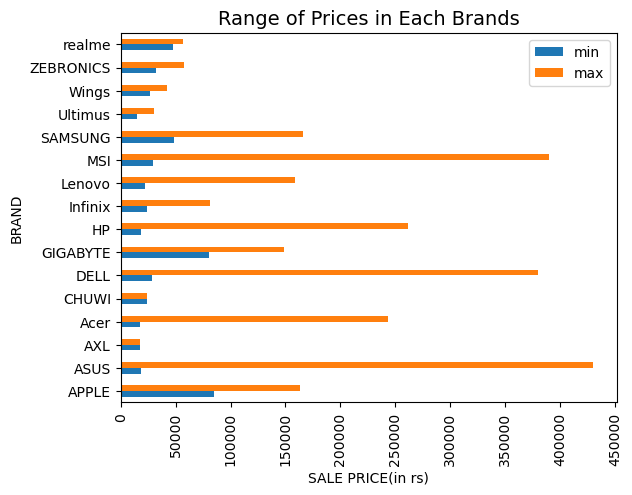

In [78]:
plt.figure(figsize=(7,7))
data.groupby('Brand')['Sale price'].agg(['min','max']).plot(kind='barh')
plt.title('Range of Prices in Each Brands',fontsize=14)
plt.ylabel('BRAND',fontsize=10,color='black')
plt.xlabel('SALE PRICE(in rs)',fontsize=10)
plt.xticks(range(0,500000,50000))
plt.xticks(rotation=90)
plt.show()

**OBSERVATION:** from the above plot we can observe that, 
+ Brands like ASUS,DELL and MSI have wide range of Sale Prices
+ Brands like APPLE,HP,LENOVO,SAMSUNG have medium range of Sale Prices

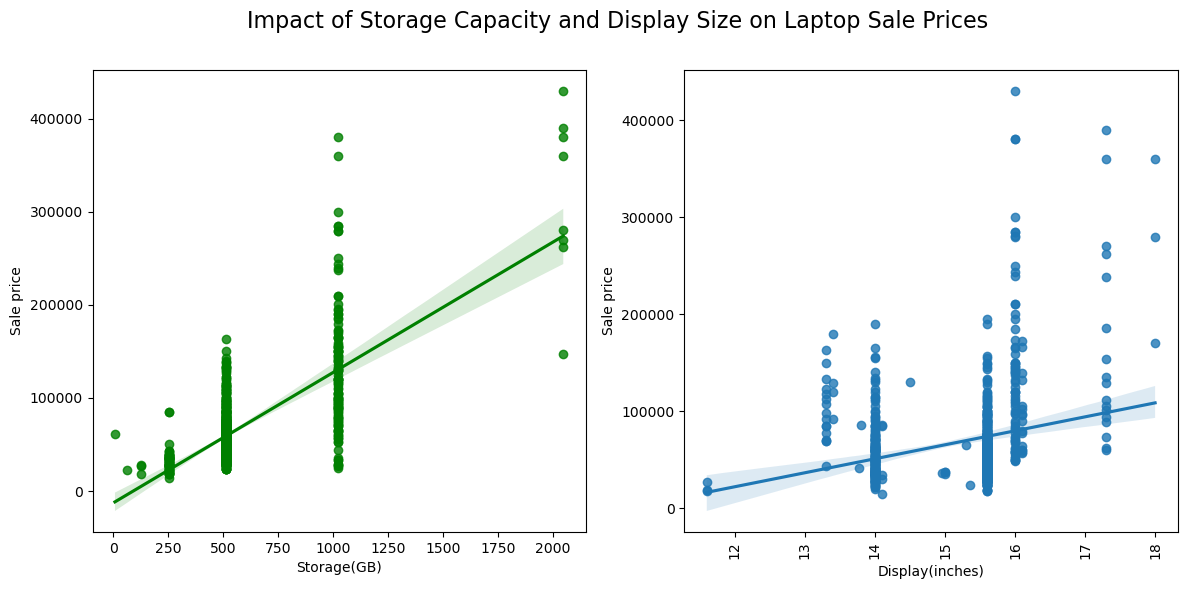

In [87]:

plt.figure(figsize=(14,6))
plt.suptitle('Impact of Storage Capacity and Display Size on Laptop Sale Prices',fontsize=16)
plt.subplot(1,2,1)
sns.regplot(data,y='Sale price',x='Storage(GB)',color='g')

plt.subplot(1,2,2)
sns.regplot(data,x='Display(inches)',y='Sale price')
plt.xticks(rotation=90)

plt.show()

**OBSERVATION:** 
+ Here, the line slope in Storage(GB) and Sale price is upwards so it is  showing a Strong positive correlation 
+ That means,if the storage increases then the Sale price also increases, so it shows a huge impact on the price
+ The line slope is Display(inches) and Sale price is slightly upward so it is showing a Weak positive correlation
+ So, we can say Display(inches) does impact on the price but not entirely.

In [36]:
data.groupby('Brand')['Rating'].agg(['min','mean','max','count'])

,min,mean,max,count
Brand,,,,
APPLE,4.2,4.540000,4.7,5
ASUS,3.0,4.226214,5.0,206
AXL,3.7,3.700000,3.7,2
Acer,3.1,4.159740,5.0,77
CHUWI,4.1,4.100000,4.1,1
DELL,1.7,3.989474,5.0,95
GIGABYTE,4.4,4.400000,4.4,4
HP,2.7,4.169388,4.9,147
Infinix,3.8,4.157692,4.8,26


<Figure size 1200x2500 with 0 Axes>

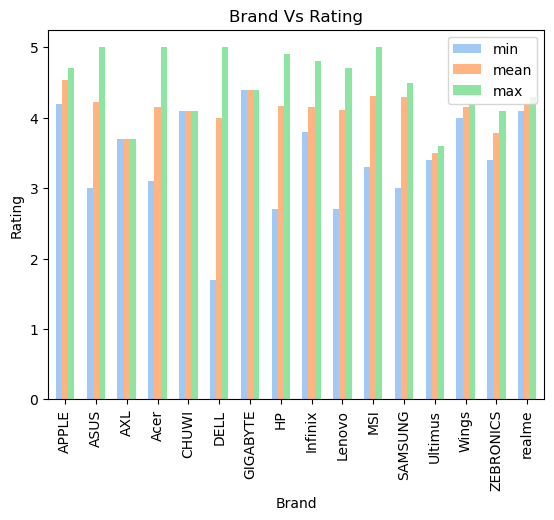

In [91]:
plt.figure(figsize=(12,25))
data.groupby('Brand')['Rating'].agg(['min','mean','max']).plot(kind='bar',color=sns.color_palette('pastel',3),width=0.6)
plt.title('Brand Vs Rating')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

**OBSERVATION:**
+ Brands like ASUS,ACER and MSI have a narrow range which means more consistent ratings but DELL has more wide range which tells us more diverse user opinions
+ So we can finally tell that ASUS,ACER and MSI are the brands with high mean ratings and Low variability

### Multivariate Analysis

<Axes: >

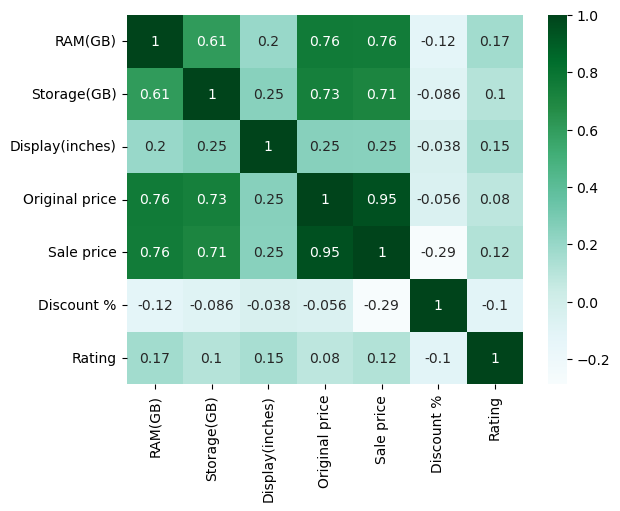

In [38]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='BuGn')

**OBSERVATION:** From the above HeatMap we observe that,
+ Original price and Sale price are Highly Correlated.
+ RAM has strong positive correlation with Original price and Sale price
+ Storage has strong positive correlation with Original price and Sale price
+ Display has weak positive correlation with the price
+ Discount has weak negative correlation with the price

Text(0.5, 1.0, 'Scatter Plot : Sale Price vs Discount % vs Storage vs RAM')

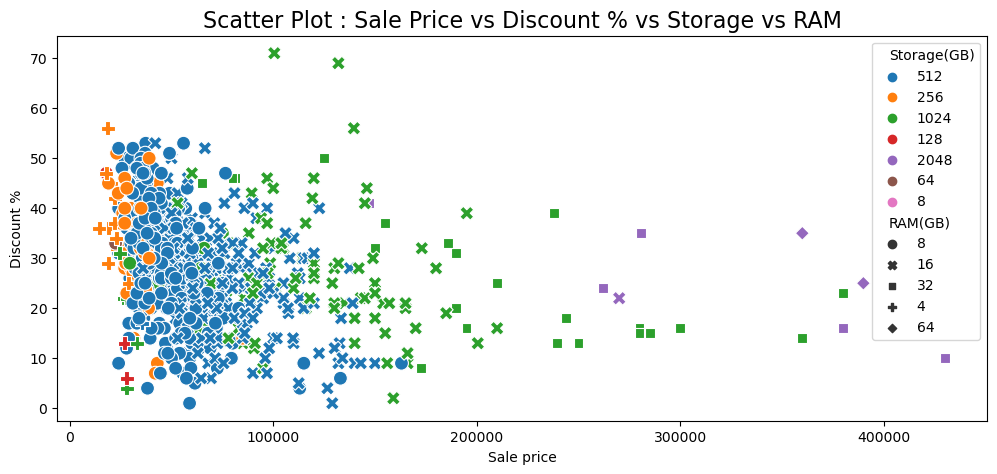

In [59]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=data['Sale price'],y=data['Discount %'],hue=data['Storage(GB)'].astype(str),style=data['RAM(GB)'].astype(str),s=100)
plt.title('Scatter Plot : Sale Price vs Discount % vs Storage vs RAM', fontsize=16)


**OBSERVATION:** from the above scatter plot we observe that,
+ Laptops are mostly with 8GB,16 GB RAM and 512GB Storage 
+ Both RAM and Storage are effecting the Sale price, in other words they have strong postive correlation
+ We can also observe that most of the Discounts are in the range of 20% to 40%

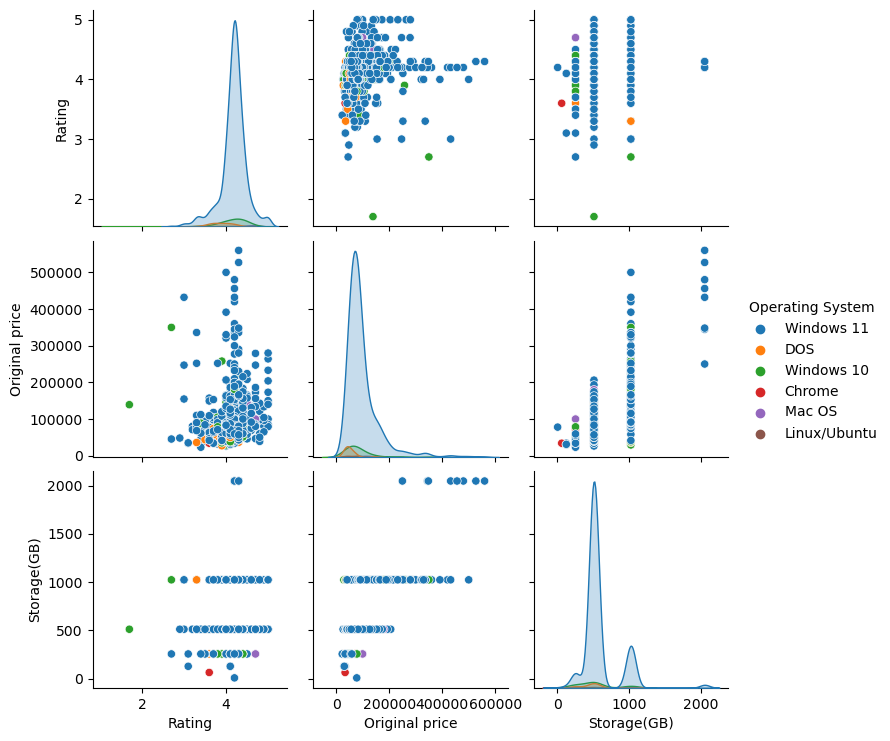

In [101]:

sns.pairplot(data,x_vars=['Rating','Original price','Storage(GB)'],y_vars=['Rating','Original price','Storage(GB)'],hue='Operating System')

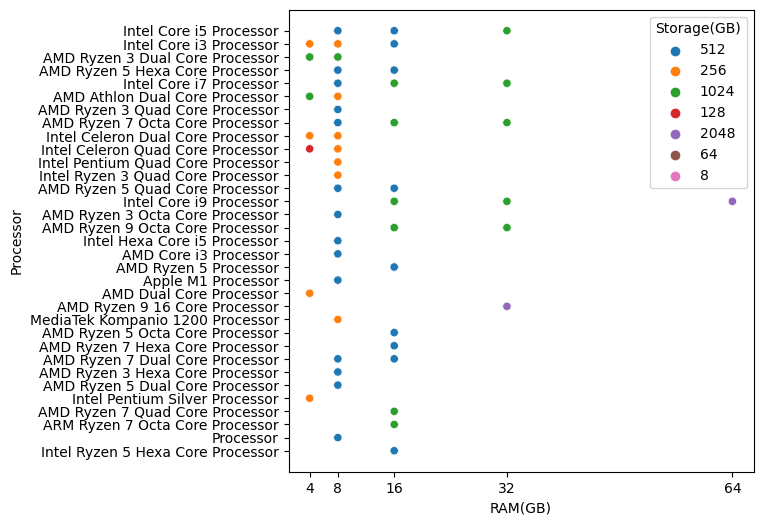

In [40]:
plt.figure(figsize=(6,6))
sns.scatterplot(data,x=data['RAM(GB)'],hue=data['Storage(GB)'].astype(str),y='Processor')
plt.xticks([4,8,16,32,64])
plt.show()

**OBSERVATION:** From the above plot,
+ we can observe the compatibility of the processor with RAM and Storage.
+ we can see that most of the processors are compatible with 8GB,16GB RAM and 512GB Storage. 

# Recommendations

In [41]:
def calculate_score(x):
    x['score']=0
    avg_sale_price=68928.48585485855
    if 50000 <= x['Sale price'] <= 100000:
        x['score'] += 100*0.2
    elif 100000 < x['Sale price'] <= 150000:
        x['score'] += 90*0.2
    elif  150000 < x['Sale price'] <= 200000:
        x['score'] += 80*0.2
    else:
        x['score'] += 60*0.2
    return x['RAM(GB)']*0.2 + x['Storage(GB)']*0.2 + x['Display(inches)']*0.2 + x['Rating']*0.2 + x['score']

In [42]:
datac=data.copy()

In [43]:
datac['Score'] = data.apply(calculate_score,axis=1)

In [44]:
top_20 = datac.nlargest(20, 'Score')

In [45]:
moderate=top_20[(top_20['Sale price']<150000) & (top_20['Sale price']>80000) ]

In [46]:
premium=top_20[top_20['Sale price']>150000]

In [47]:
affordable=top_20[top_20['Sale price']<80000]

In [48]:
premium

,Model Name,Brand,Processor,RAM(GB),Storage(GB),Storage Type,Operating System,Display(inches),Original price,Sale price,Discount %,Rating,Score
304,MSI GT77 Titan Core i9 12th Gen Intel® Core™ i...,MSI,Intel Core i9 Processor,64,2048,SSD,Windows 11,17.3,526990,389990,25,4.3,438.72
613,MSI Raider GE78 Core i9 13th Gen 13980HX - (64...,MSI,Intel Core i9 Processor,64,2048,SSD,Windows 11,17.3,559990,359990,35,4.3,438.72
283,HP Omen Intel Core i9 12th Gen 12900HX - (32 G...,HP,Intel Core i9 Processor,32,2048,SSD,Windows 11,17.3,344736,261877,24,4.2,432.30
228,ASUS ROG Zephyrus Duo 16 with 90WHr Battery Ry...,ASUS,AMD Ryzen 9 16 Core Processor,32,2048,SSD,Windows 11,16.0,479990,429990,10,4.2,432.04
334,ASUS ROG Zephyrus Duo 16 (2022) Dual Screen La...,ASUS,AMD Ryzen 9 Octa Core Processor,32,2048,SSD,Windows 11,16.0,431990,280790,35,4.2,432.04
626,ASUS ROG Zephyrus Duo 16 with 90WHr Battery Ry...,ASUS,AMD Ryzen 9 16 Core Processor,32,2048,SSD,Windows 11,16.0,455990,379990,16,4.2,432.04
742,MSI Stealth 17 Core i7 13th Gen 13700H - (16 G...,MSI,Intel Core i7 Processor,16,2048,SSD,Windows 11,17.3,347990,269990,22,4.3,429.12


In [49]:
affordable

,Model Name,Brand,Processor,RAM(GB),Storage(GB),Storage Type,Operating System,Display(inches),Original price,Sale price,Discount %,Rating,Score
436,Infinix ZEROBOOK 13 Intel Core i9 13th Gen 139...,Infinix,Intel Core i9 Processor,32,1024,SSD,Windows 11,15.6,149900,79990,46,4.2,235.16
227,Infinix ZEROBOOK 13 Intel Core i7 13th Gen 137...,Infinix,Intel Core i7 Processor,32,1024,SSD,Windows 11,15.6,119990,64990,45,4.1,235.14
107,ASUS Vivobook 16 (2023) Ryzen 5 Hexa Core 7530...,ASUS,AMD Ryzen 5 Hexa Core Processor,16,1024,SSD,Windows 11,16.0,82990,55990,32,4.3,232.06
721,Lenovo ThinkBook 15 Core i5 12th Gen 1235U - (...,Lenovo,Intel Core i5 Processor,16,1024,SSD,Windows 11,15.6,115200,59999,47,4.6,232.04


In [50]:
moderate

,Model Name,Brand,Processor,RAM(GB),Storage(GB),Storage Type,Operating System,Display(inches),Original price,Sale price,Discount %,Rating,Score
287,Acer Predator Triton 500 SE Core i7 12th Gen 1...,Acer,Intel Core i7 Processor,32,2048,SSD,Windows 11,16.0,249999,147090,41,4.2,438.04
97,MSI Katana 15 Core i5 13th Gen 13500H - (32 GB...,MSI,Intel Core i5 Processor,32,1024,SSD,Windows 11,15.6,114990,88990,22,4.6,235.24
217,Infinix ZERO BOOK ULTRA Series Laptop Intel Co...,Infinix,Intel Core i9 Processor,32,1024,SSD,Windows 11,15.6,149990,80990,46,4.2,235.16
102,Lenovo Legion 5 Pro AMD Ryzen 7 Octa Core 6800...,Lenovo,AMD Ryzen 7 Octa Core Processor,32,1024,SSD,Windows 11,16.0,251890,124990,50,4.1,233.22
309,MSI Creator 15 Core i7 10th Gen 10875H - (32 G...,MSI,Intel Core i7 Processor,32,1024,SSD,Windows 10,15.6,223490,149990,32,4.3,233.18
691,MSI Katana 15 Core i7 12th Gen 12650H - (16 GB...,MSI,Intel Core i7 Processor,16,1024,SSD,Windows 11,15.6,139990,94990,32,5.0,232.12
563,Acer Swift X Core i7 11th Gen 11390H - (16 GB/...,Acer,Intel Core i7 Processor,16,1024,SSD,Windows 11,16.1,134999,97290,27,4.2,232.06
242,Acer Swift Edge OLED Ryzen 7 Octa Core 6800U -...,Acer,AMD Ryzen 7 Octa Core Processor,16,1024,SSD,Windows 11,16.0,138999,98490,29,4.2,232.04
80,Acer Nitro 5 Core i7 12th Gen 12650H - (16 GB/...,Acer,Intel Core i7 Processor,16,1024,SSD,Windows 11,15.6,181999,96990,46,4.4,232.00
